### Name : Mohamed Abdalla
### ID       : 21242062

In [240]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
# import bank csv
bank_df = pd.read_csv('./bank.csv')

In [242]:
# Print first 5 rows of the dataframe
bank_df.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [243]:
# Print last 5 rows of the dataframe
bank_df.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

### Dataset insights:
- 2000 examples <br>
- 17 features <br>
- 5 numerical attributes<br>
- 12 categorical attributes <br>
- attribut called subscribed -> is the desired target. Has the client subscribed a term deposit? (binary: 'yes','no') <br>



# Formulate a particular question that might be interesting to answer by exploring this dataset:
Formulate a particular question that might be interesting to answer by exploring this dataset (approx. 50 words in a markdown cell).
##### 1- How can loans (housing / personal) affect customer decision to subscribe ?

# Statistics for the numerical and categorical attributes:
Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).

In [244]:
bank_df.describe().transpose()

count         mean          std    min     25%    50%     75%  \
age       1988.0    41.753018    12.724358   18.0   32.00   38.0    50.0   
balance   2000.0  1413.663500  3131.224213 -980.0  201.50  551.0  1644.5   
day       2000.0    13.851500     9.712189    1.0    5.00   12.0    23.0   
duration  2000.0   292.020500   221.557295    7.0  146.00  236.0   379.0   
campaign  2000.0     1.909500     1.378862    1.0    1.00    1.0     2.0   
pdays     2000.0   167.896000   131.754126   -1.0   75.75  182.0   251.0   
previous  2000.0     2.561500     3.400735    0.0    1.00    2.0     3.0   

              max  
age          93.0  
balance   81204.0  
day          31.0  
duration   1823.0  
campaign     11.0  
pdays       854.0  
previous     55.0

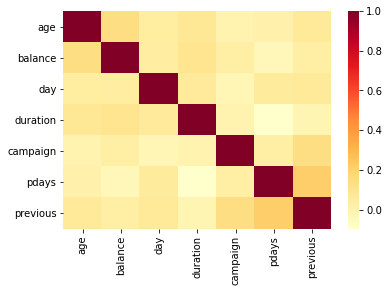

In [245]:
#correlation matrix
sns.color_palette("Set2")
sns.heatmap(bank_df.corr(),cmap="YlOrRd");

### Insights about numerical features:
- day attribute is a categorical features as month and day of week and the values are {1,2...30,31} <br>
- age attribute is missing for (2000-1988) 12 examples <br>
- pdays attribute minimum value is -1 which indicates customer not contacted before<br>
- By comparing mean to midean, we can see that there is a skew in data in balance attributes where mean = 1413.663500 and median = 551.0.
- From the Heatmap and pair-plots: It seems that there are low correlation between numerical features<br>

In [246]:
bank_df.describe(exclude=[np.number])

job  marital  education default housing  loan   contact month  \
count         1990     2000       1896    2000    2000  2000      1809  2000   
unique          11        3          3       2       2     2         2    12   
top     management  married  secondary      no      no    no  cellular   feb   
freq           461     1111        995    1985    1037  1750      1663   404   

       poutcome subscribed  
count      1546       2000  
unique        3          2  
top     failure         no  
freq        955       1000

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64


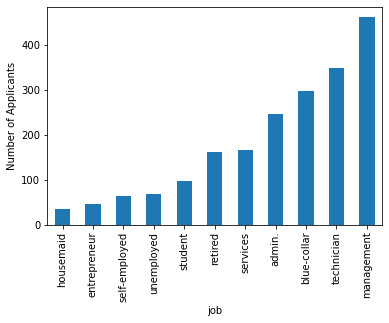

married     1111
single       674
divorced     215
Name: marital, dtype: int64


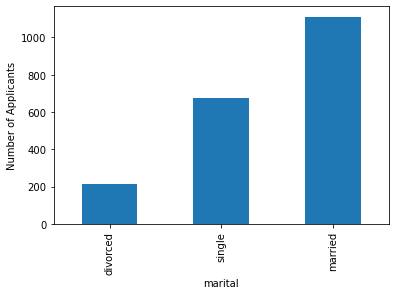

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64


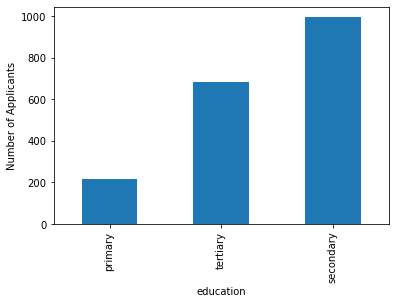

no     1985
yes      15
Name: default, dtype: int64


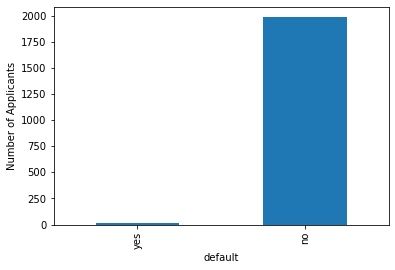

no     1037
yes     963
Name: housing, dtype: int64


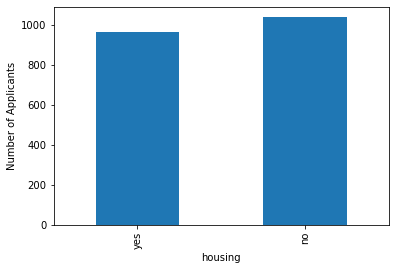

no     1750
yes     250
Name: loan, dtype: int64


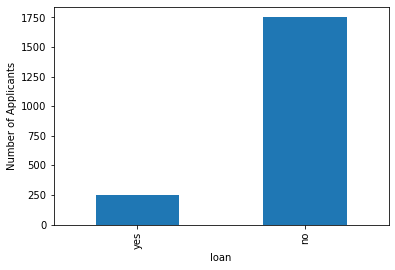

cellular     1663
telephone     146
Name: contact, dtype: int64


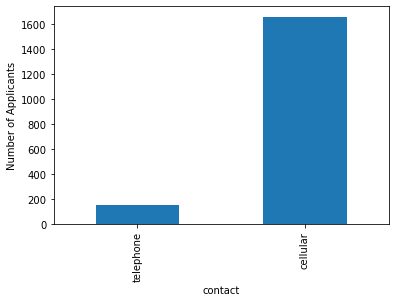

feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41
Name: month, dtype: int64


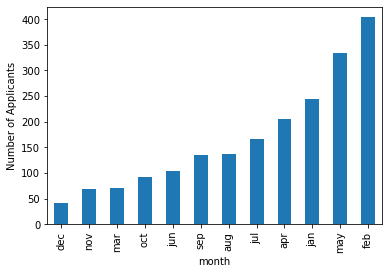

failure    955
success    444
other      147
Name: poutcome, dtype: int64


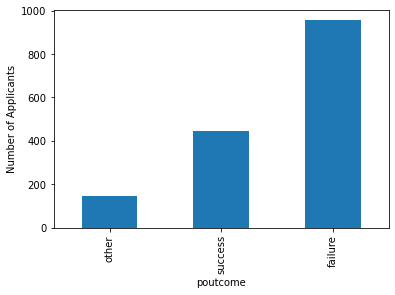

no     1000
yes    1000
Name: subscribed, dtype: int64


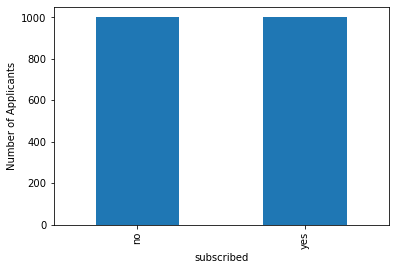

8     204
29    187
2     156
4     148
5     104
3      95
6      92
28     92
13     68
30     68
17     66
9      60
12     55
16     55
14     54
20     52
15     46
1      45
22     37
26     37
23     33
27     33
10     33
21     32
11     28
25     26
18     24
19     21
7      19
24     18
31     12
Name: day, dtype: int64


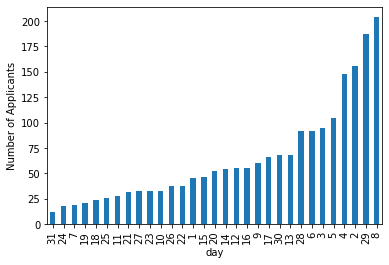

In [247]:
cat_list =['job','marital','education','default','housing','loan','contact','month','poutcome','subscribed','day']
for cat in cat_list:
    frequency_table = bank_df[cat].value_counts(ascending=True)
    frequency_table.plot(kind='bar')
    plt.xlabel(cat)
    plt.ylabel('Number of Applicants')
    print(bank_df[cat].value_counts())
    plt.show()

### Insights about categorical features:

##### Missing enteries:
- job attribute is missing in 10 examples <br>
- education attribute is missing in 104 examples <br>
- contact attribute is missing in 191 examples <br>
- poutcome attribute is missing for 454 examples when pday = -1<br>

##### Housing Vs Personal loans:
- 963 out of 2000 customer have housing loan [48.15%] <br>
- 205 out of 2000 customer have personal loans [12.5%] <br>

#### Others:
- More than holf(55.5%) of the examples are married. <br>
- The migority (99.25%) of examples do not have credit in default. <br>
- The dataset has 50/50 descions for subscrib/unsubscribe.<br>
- Almost half of examples are with scondary school level of education. <br>
- Around quarter of customer contacted (23%) working in managment.

# Plot the distribution of some numerical attributes:
Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


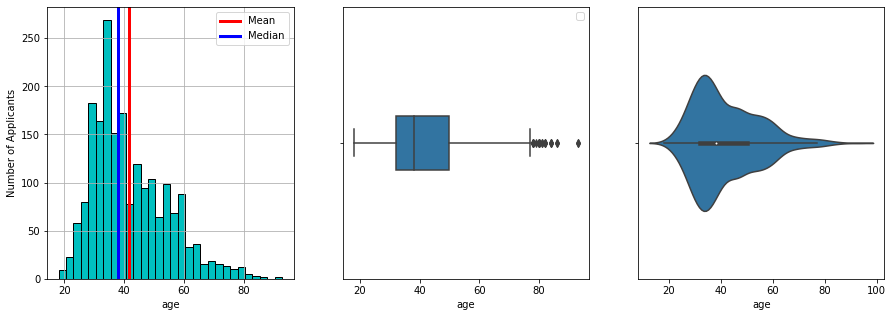

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


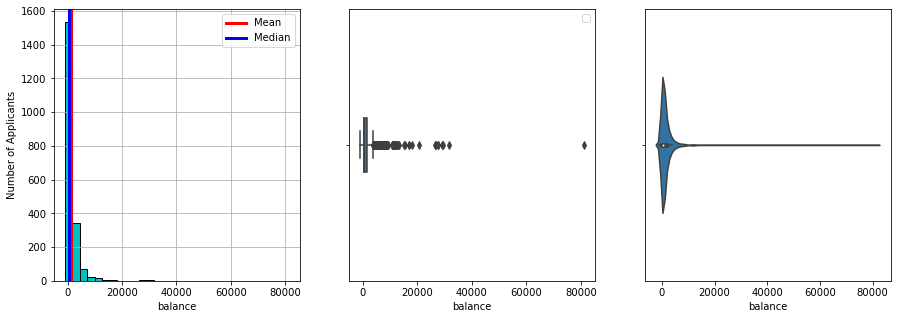

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


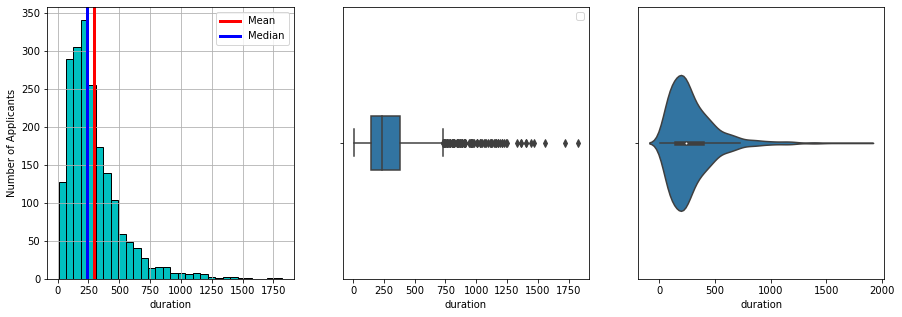

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


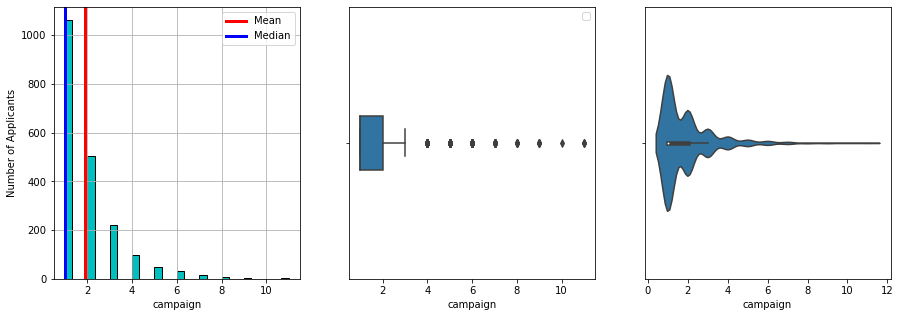

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


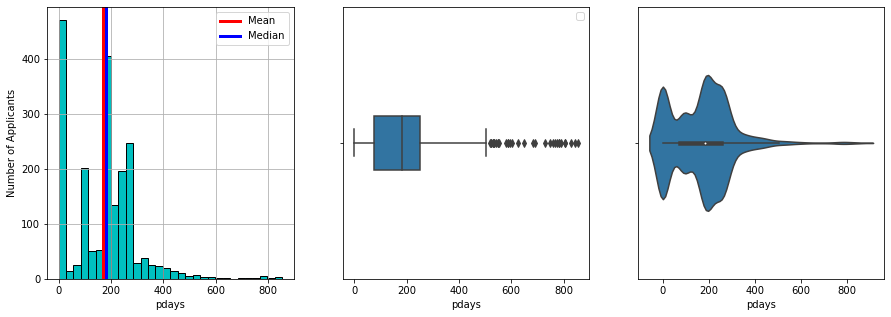

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


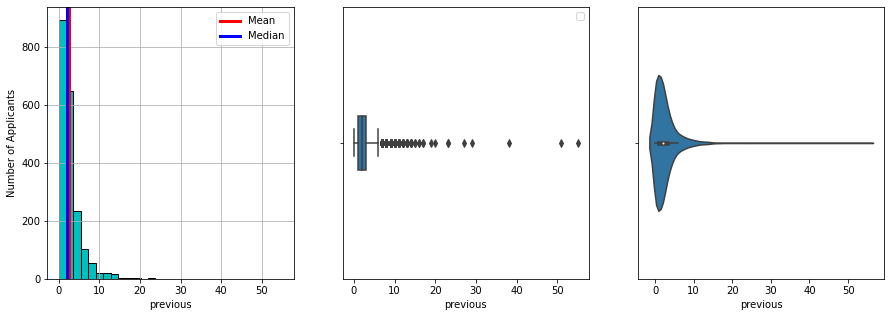

In [248]:
cat_list =["age","balance","duration","campaign","pdays","previous"]

for cat in cat_list:
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    bank_df[cat].hist(bins=30,color='c',edgecolor='k')
    plt.axvline(bank_df[cat].mean(), color='r', linewidth=3, label='Mean')
    plt.axvline(bank_df[cat].median(), color='b',linewidth=3, label='Median')
    plt.xlabel(cat)
    plt.ylabel('Number of Applicants')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    sns.boxplot(x=bank_df[cat], orient='v', width=0.2)
    plt.legend()
    
    plt.subplot(1, 3, 3)
    sns.violinplot(x=bank_df[cat], orient='v', width=0.5)
    
    plt.show()

### General Insights about numerical distributions:
- age feature tends to have a distribution that approximately normal distribution.<br>
- balance feature is skewed and have a lot of outliers.<br>
- duration distribution is concentrated between 0 to 500 after that starts to drop gradually.<br>
- there are also many outlier is the duration.<br>
- the distribution of campaign is concentrated in 1 and 1 after that highly drops.<br>
- pday distribution is some how random have peak at different values and many outliers.<br>
- previous feature is skewed and have a lot of outliers.

### Insights about age distribution:


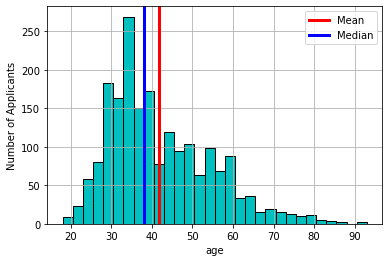

In [249]:
bank_df['age'].hist(bins=30,color='c',edgecolor='k')
plt.axvline(bank_df['age'].mean(), color='r', linewidth=3, label='Mean')
plt.axvline(bank_df['age'].median(), color='b',linewidth=3, label='Median')
plt.xlabel("age")
plt.ylabel('Number of Applicants')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


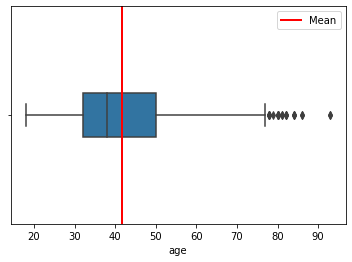

In [250]:
sns.boxplot(x=bank_df['age'], orient='v', width=0.2)
plt.axvline(bank_df['age'].mean(), color='r', linewidth=2, label='Mean')
plt.legend()
plt.show()

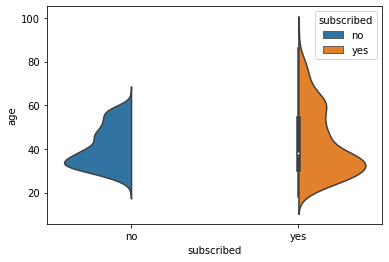

In [251]:
sns.violinplot(data=bank_df, x='subscribed', y ='age', hue='subscribed', split=True)
plt.show()

### Insights about age distrbution:
##### From the Histogram we can see:
- the peak for age atrribute is between 28 and 40 years.
- Starts to slowly decay between 40 and 60, then after 60 decays with higher rate.

##### From the box plot we can see:
- The lowest score is around 18.
- The highest score excluding outliers is around 77.
- Around 50% of customers' ages between 32 to 50.
- We have some outliers after 77.

##### From the violin plot we can see:
- We can see that the distrbution of age for not subscribed customers is more even than distribution of age for subscribed customers.

# Two plots with the combined distribution of attributes:
Generate two plots with the combined distribution of attributes and draw conclusions from them (approx. 150 words in a markdown cell).

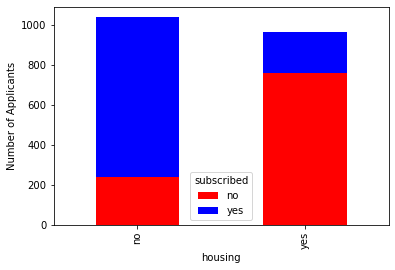

In [252]:
crosstab_CL = pd.crosstab(bank_df['housing'], bank_df['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.show()

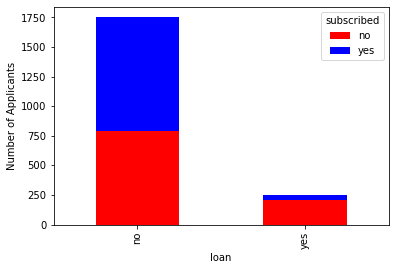

In [253]:
crosstab_CL = pd.crosstab(bank_df['loan'], bank_df['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.show()

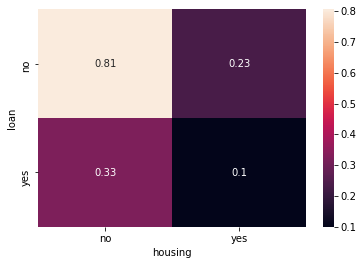

In [254]:
pivot_table_LCG = bank_df.pivot_table(values='subscribed', 
                           index='loan', 
                           columns='housing',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

### Insights about effect of loan features on customer decision:
- First plot is a stackchart for housing loan and subscription decision against number of applicants.<br>
- Second plot is a stackchart for personal loan and subscription decision against number of applicants.<br>
- From the 2 plots, we can conclude that if the customer is engaged to ether housing or personal loan it most probably that the customer will not subscribe. <br>
- So, housing and personal loans play a significant role for customerto take a decision for subscription.
- From the heatmap above we can see that if the customer with no loans has the hights potential to subscribe.

##### This analysis shows that learning from dataset we have is possible and we have good attribute that enable us to learn and predict.